# LDA - Linear Discriminant Analysis (LDA)

__Linear Discriminant Analysis (LDA)__ is a __supervised__ dimensionality reduction and classification technique that projects high-dimensional data onto a lower-dimensional space to __maximize class separability__. Unlike PCA, which is unsupervised and maximizes variance, LDA uses class labels to find the axes that best discriminate between classes.

Objectives:
  - Maximize between-class variance
  - Minimize within-class variance

Let:
 - $X \in \mathbb{R}^{n \times d}$: feature matrix
 - $y \in \{1, \dots, K\}$: class labels
 - $\mu_k$: mean of class k
 - $\mu$: global mean
 - $S_W$: within-class scatter matrix
 - $S_B$: between-class scatter matrix

Scatter Matrices:
  - Within-class scatter:
     - $S_W = \sum_{k=1}^K \sum_{x_i \in C_k} (x_i - \mu_k)(x_i - \mu_k)^T$
  - Between-class scatter:
     - $S_B = \sum_{k=1}^K n_k (\mu_k - \mu)(\mu_k - \mu)^T$

Goal:

Solve the generalized eigenvalue problem:
$S_W^{-1} S_B w = \lambda w$

__Top eigenvectors form the LDA transformation matrix__. Use LDA if:
 - You are working on a classification task
 - You have labeled data
 - Your goal is to reduce dimensions while retaining class-discriminative power


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import pandas as pd

In [2]:
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

In [3]:
# Fit LDA
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X, y)

In [4]:

# Convert to DataFrame for plotting
df = pd.DataFrame(X_lda, columns=["LD1", "LD2"])
df["label"] = [target_names[i] for i in y]

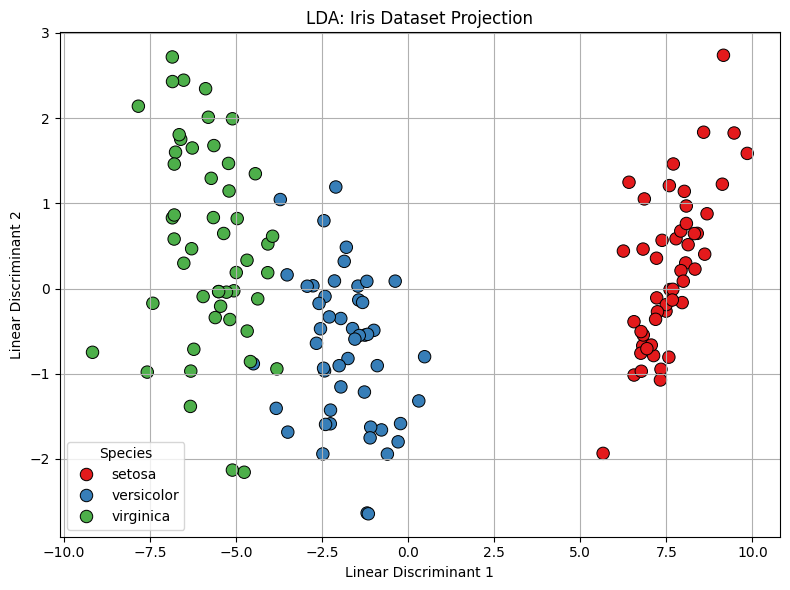

In [5]:

# Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="LD1", y="LD2", hue="label",
                palette="Set1", s=80, edgecolor='k')
plt.title("LDA: Iris Dataset Projection")
plt.xlabel("Linear Discriminant 1")
plt.ylabel("Linear Discriminant 2")
plt.grid(True)
plt.legend(title="Species")
plt.tight_layout()
plt.show()

In [6]:
# Mean of each feature per class
print("Class means (in original feature space):")
print(pd.DataFrame(lda.means_, index=iris.target_names, columns=iris.feature_names))

Class means (in original feature space):
            sepal length (cm)  sepal width (cm)  petal length (cm)  \
setosa                  5.006             3.428              1.462   
versicolor              5.936             2.770              4.260   
virginica               6.588             2.974              5.552   

            petal width (cm)  
setosa                 0.246  
versicolor             1.326  
virginica              2.026  


In [7]:
print("\nOverall mean (x̄):")
print(lda.xbar_)


Overall mean (x̄):
[5.84333333 3.05733333 3.758      1.19933333]


In [8]:
print("\nScalings_ (Linear Discriminants, eigenvectors):")
print(pd.DataFrame(lda.scalings_,
      index=iris.feature_names, columns=["LD1", "LD2"]))


Scalings_ (Linear Discriminants, eigenvectors):
                        LD1       LD2
sepal length (cm)  0.829378  0.024102
sepal width (cm)   1.534473  2.164521
petal length (cm) -2.201212 -0.931921
petal width (cm)  -2.810460  2.839188


In [9]:
print("\nExplained variance ratio:")
print(lda.explained_variance_ratio_)


Explained variance ratio:
[0.9912126 0.0087874]


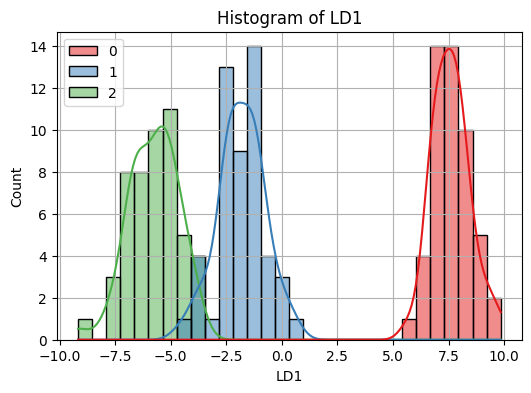

In [10]:
plt.figure(figsize=(6, 4))
sns.histplot(x=X_lda[:, 0], hue=iris.target, palette="Set1", bins=30, kde=True)
plt.title("Histogram of LD1")
plt.xlabel("LD1")
plt.grid(True)
plt.show()